# Case Study on Correlation and Regression
A textile company regularly spent money on five advertising companies for their
ads. (Dataset - Add_sales_data_2018.csv )
1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.
2. Build a regression model to predict the profit from the given data and
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement.
* Add1(in Thousands) 290
* Add2(in Thousands) 312
* Add3(in Thousands) 309
* Add4(in Thousands) 298
* Add5(in Thousands) 320

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
data_df=pd.read_csv('Add_sales_data_2018.csv')
data_df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


### 1. Relationship between the amount spent for advertising through five different companies and profit generated

In [3]:
#Finding the correlation of the dataset
data_corr= data_df.corr()

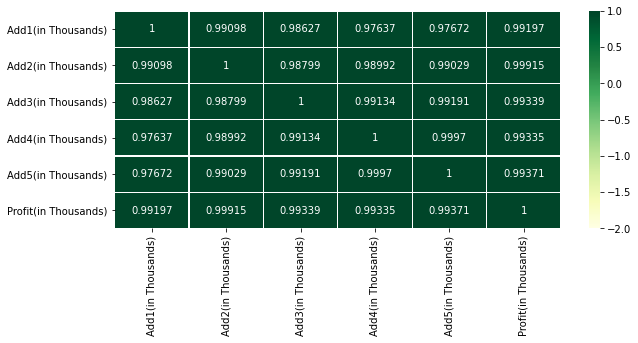

In [4]:
#Heatmap to represent the correlation coefficient
plt.subplots(figsize=(10,4))
sns.heatmap(data_corr,fmt='.5g',vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='YlGn')
plt.show()

### Insights:
  * There is a strong positive correlation between the amount spend on advertisement and profit earned by the company.
  * When the amount in advertisement increases it leds to an increase in Profit earned.
  * The value of 'Add2' affects more in the 'Profit' than others cause the correlation is approximately 1.

### 2. Regression model to predict the profit

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Creating Datasets for training and testing
x=data_df.drop(['Profit(in Thousands)','Date'],axis=1)
y=data_df['Profit(in Thousands)']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.25)

In [7]:
#Model Creation with the training data
from sklearn import linear_model
lr=linear_model.LinearRegression()
model= lr.fit(x_train,y_train)

In [8]:
#Prediction by the testing data
predict_data=model.predict(x_test)
predict_data

array([5190.758, 5239.06 , 5728.804, 4890.723, 4436.321, 4434.805,
       5013.207, 4980.446, 4391.665, 4925.861, 5051.755, 5133.766,
       4922.845, 5017.503, 5767.839, 5861.83 , 5397.739, 4907.56 ,
       4648.627, 5577.15 , 5001.615, 5043.705, 4606.34 , 5378.379,
       5452.28 , 4411.775, 5167.878, 5903.253, 4513.6  , 4451.999,
       5212.949, 5146.949, 4093.065, 5113.337, 5745.806, 5234.487,
       4419.421, 5247.011, 4486.996, 5962.336, 5805.521, 4350.683,
       4416.136, 5131.898, 5425.19 , 5078.636, 5784.54 , 5030.451,
       6137.8  , 5088.455, 4836.837, 4482.183])

In [9]:
#Checking the mean_squared_error to know the efficiency of the model created
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predict_data)

3.06215899839342e-25

### Insights: 
* The model is trained with 75% of data, with the features having high correlation between the independent and depedent variable.
* The predicted data had a very less value for mean_squared_error that means the model works fine and its predictions will be almost perfect.

### 3. Predict the profit generated by the company if the money spend is
* Add1(in Thousands) - 290
* Add2(in Thousands) - 312
* Add3(in Thousands) - 309
* Add4(in Thousands) - 298
* Add5(in Thousands) - 320

In [10]:
new_list = [[290,312,309,298,320]]
model.predict(new_list).item()

5820.060000000001

### Insights : 
The model predicted that the company will get approximately 5820 (in Thousands) Rupees if the money spend on advertisements is 290,312,309,298 and 320 (in Thousands) respectively for Add1, Add2, Add3, Add4 and Add5.